# Gold Price Prediction

Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [5]:
gold_data=pd.read_csv("gld_price_data.csv")
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
gold_data.shape

(2290, 6)

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
gold_data.describe

<bound method NDFrame.describe of            Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]>

In [10]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

# Correlation:



1. Positive Correlation
2. Negative Correlation

In [14]:
#correlation = gold_data.corr()

# Convert the date column to datetime format
gold_data['Date'] = pd.to_datetime(gold_data['Date'], errors='coerce')

# Drop non-numeric columns
numeric_gold_data = gold_data.select_dtypes(include=[np.number])

# Calculate correlation
correlation = numeric_gold_data.corr()



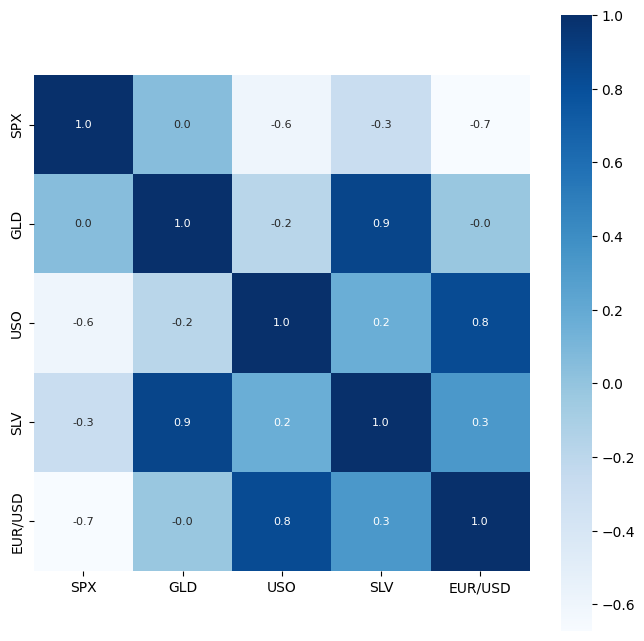

In [16]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

In [17]:
# correlation value of GLD
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\PRATIM PAL\AppData\Local\Temp\ipykernel_6944\251922148.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_gold_data["GLD"], color='green')


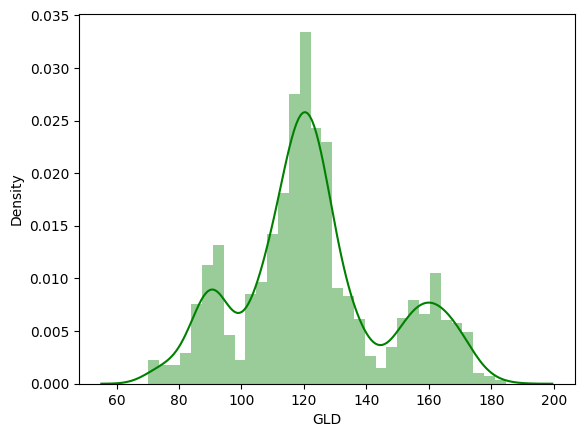

In [23]:
# checking the gold GLD price distribution
sns.distplot(numeric_gold_data["GLD"], color='green')
plt.show()

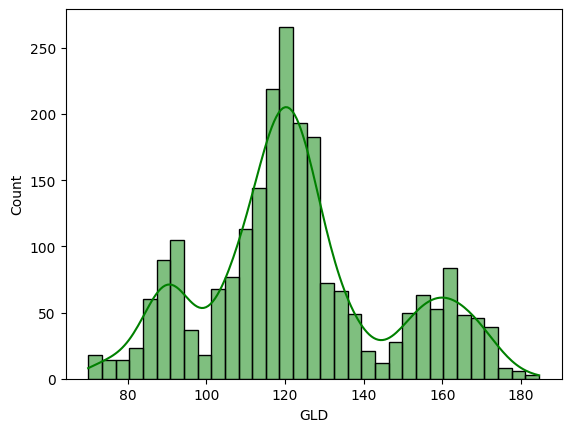

In [27]:
import seaborn as sns

# Using histplot to create a histogram with KDE
sns.histplot(gold_data["GLD"], kde=True, color='green')
plt.show()


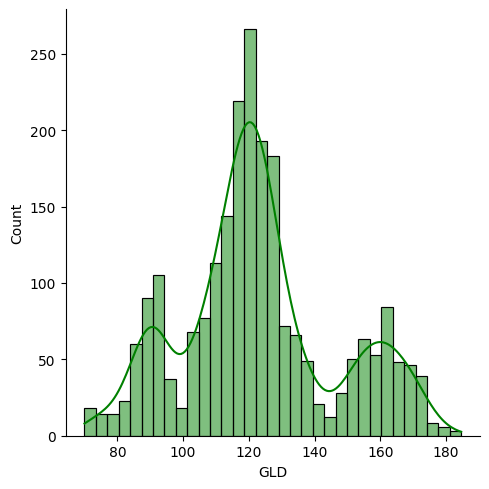

In [28]:
import seaborn as sns

# Using displot to create a histogram with KDE
sns.displot(numeric_gold_data["GLD"], kde=True, color='green')
plt.show()


# Splitting the Features and Target

In [31]:
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [35]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [36]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting into Training data and Test Data

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Model Training: Random Forest Regressor

In [38]:
regressor=RandomForestRegressor(n_estimators=100)

In [39]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [40]:
regressor.score(x_train,y_train)*100 , regressor.score(x_test,y_test)*100

(99.85186628390366, 98.98458847438364)

# Model Evaluation

In [44]:
test_data_prediction=regressor.predict(x_test)
test_data_prediction

array([122.4391997 , 130.21230315, 127.49239984,  96.49969771,
       118.80200065, 114.37019901, 124.85000134, 117.82159923,
       108.04690126,  98.16819972,  95.76599946, 167.47279866,
       150.41020189, 116.10430076, 170.8981019 ,  85.09599999,
       123.29629885, 109.38849764, 112.9090009 , 131.50630301,
       124.19209914, 113.84410088, 115.66080077, 108.7529997 ,
       108.48000153, 125.82409898, 119.15469989, 112.30539943,
       113.44980155, 125.21879914, 145.73360074,  89.66440032,
       167.41619982, 113.71509937, 108.33570105, 120.04840115,
       141.83619871, 161.09560113, 173.97889816, 153.10060141,
       119.19920126, 113.61960044, 121.37609908, 113.75049935,
       122.06570018, 107.95890096,  88.29299882, 114.51889918,
       129.69300232, 117.86830103, 104.04900007, 129.65100257,
       107.1599985 , 160.42080299, 132.06520038, 118.21839978,
       146.55650048, 135.59470241,  95.78450116, 124.55160159,
       114.88049892,  86.32430048, 104.31759921, 113.75

In [46]:
from sklearn.metrics import r2_score

In [47]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9898458847438364


# Compare the Actual Values and Predicted Values in a Plot

In [49]:
Y_test = list(y_test)

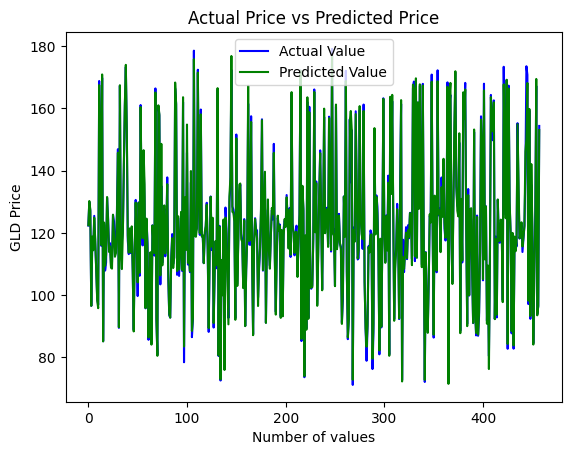

In [53]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()